#### İlk olarak kütüphaneleri aktive ettik. Ve sigorta veri setini okuttuk. Her olasılığı göze alarak veri setinin yedeğini oluşturduk.

#### Sigorta Veri Seti:
* age : Yaş
* sex : Cinsiyet
* bmi : Vücut Kitle Endeksi
* children : Çocuklar 
* smoker : Sigara İçiyor Mu? = no : hayır, yes : evet
* region : Bölge
* charges : Harcamalar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings("ignore")

In [3]:
sigortaVeriSeti=pd.read_excel(r"C:\Users\beyza\Desktop\FirdesBeyzanurSenocak_20040718015\ExcelVerileri\sigorta.xlsx")
sigortaVeriSeti=sigortaVeriSeti[['age','sex','bmi','children','smoker','region','charges']]
fbs = sigortaVeriSeti.copy()
sigortaVeriSeti.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,279,0,yes,southwest,16884924
1,18,male,3377,1,no,southeast,17255523
2,28,male,33,3,no,southeast,4449462
3,33,male,22705,0,no,northwest,2198447061
4,32,male,2888,0,no,northwest,38668552


In [4]:
yeniİsimlendirmeler = ['Yaş','Cinsiyet','Vücut Kitle Endeksi','Çocuklar','Sigara İçiyor Mu? ','Bölge','Harcamalar']
sigortaVeriSeti.columns = yeniİsimlendirmeler
sigortaVeriSeti.head()

,Yaş,Cinsiyet,Vücut Kitle Endeksi,Çocuklar,Sigara İçiyor Mu?,Bölge,Harcamalar
0,19,female,279,0,yes,southwest,16884924
1,18,male,3377,1,no,southeast,17255523
2,28,male,33,3,no,southeast,4449462
3,33,male,22705,0,no,northwest,2198447061
4,32,male,2888,0,no,northwest,38668552


#### Verimizdeki yes ve no cevaplarını 1 ve 0 değerleriyle değiştirdik.
#### Verimizdeki female ve male cevaplarını da 1 ve 0 değerleriyle değiştirdik.

In [5]:
sigortaVeriSeti = sigortaVeriSeti.replace(['yes','no'], [1,0])
#female(kadın) = 1; male(erkek) = 0
sigortaVeriSeti = sigortaVeriSeti.replace(['female','male'], [1,0])
display(sigortaVeriSeti.head())

,Yaş,Cinsiyet,Vücut Kitle Endeksi,Çocuklar,Sigara İçiyor Mu?,Bölge,Harcamalar
0,19,1,279,0,1,southwest,16884924
1,18,0,3377,1,0,southeast,17255523
2,28,0,33,3,0,southeast,4449462
3,33,0,22705,0,0,northwest,2198447061
4,32,0,2888,0,0,northwest,38668552


#### X sütunundan bazı verileri sildik ve Y sütununa Harcamalar verisini atadık.
#### X ve Y'yi train ve test olarak ayırdık.

In [6]:
from sklearn.model_selection import train_test_split

X = sigortaVeriSeti.drop(['Harcamalar','Cinsiyet','Bölge'], axis=1)
Y = sigortaVeriSeti["Harcamalar"]

XDizisi, XTest, YDizisi, YTest = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Decision Tree Classifier hesapladık.

In [7]:
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(XDizisi, YDizisi)
Y1Tahmin = classifier.predict(XTest)

from sklearn.metrics import classification_report
print(classification_report(YTest,Y1Tahmin))

              precision    recall  f1-score   support

       86153       0.00      0.00      0.00       0.0
      196478       0.00      0.00      0.00       1.0
      197295       0.00      0.00      0.00       1.0
      198007       0.00      0.00      0.00       0.0
      768267       0.00      0.00      0.00       1.0
      896833       0.00      0.00      0.00       0.0
      972453       0.00      0.00      0.00       1.0
      996406       0.00      0.00      0.00       1.0
     1145528       0.00      0.00      0.00       0.0
     1183716       0.00      0.00      0.00       1.0
     1253936       0.00      0.00      0.00       1.0
     1346252       0.00      0.00      0.00       0.0
     1411962       0.00      0.00      0.00       0.0
     1712227       0.00      0.00      0.00       0.0
     1832094       0.00      0.00      0.00       0.0
     1880487       0.00      0.00      0.00       1.0
     1969614       0.00      0.00      0.00       1.0
     2007945       0.00    

#### Confusion (Karışıklık) Matrisini çizdirdik.

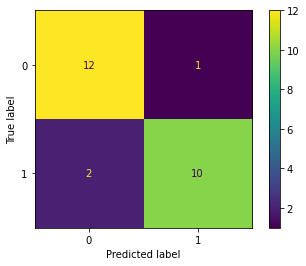

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix


X, Y = make_classification(random_state=0)
XDizisi, XTest, YDizisi, YTest = train_test_split(X, Y, random_state=0)

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(XDizisi, YDizisi)


plot_confusion_matrix(classifier, XTest, YTest) 
plt.show()

#### Random Forest Classifier hesapladık.

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,criterion = 'gini')
classifier.fit(XDizisi, YDizisi)

Y2Tahmin = classifier.predict(XTest)
from sklearn.metrics import classification_report
print(classification_report(YTest,Y2Tahmin))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



#### Confusion (Karışıklık) Matrisini çizdirdik.

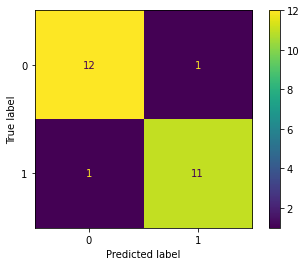

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix


X, Y = make_classification(random_state=0)
XDizisi, XTest, YDizisi, YTest = train_test_split(X, Y, random_state=0)

classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,criterion = 'gini')
classifier.fit(XDizisi, YDizisi)


plot_confusion_matrix(classifier, XTest, YTest) 
plt.show()

#### Logistic Regression hesapladık.

In [11]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(XDizisi, YDizisi)

Y3Tahmin = classifier.predict(XTest)
from sklearn.metrics import classification_report
print(classification_report(YTest,Y3Tahmin))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



#### Confusion (Karışıklık) Matrisini çizdirdik.

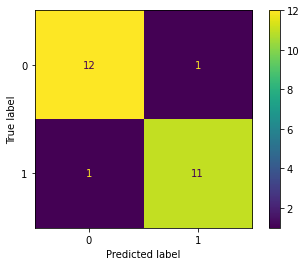

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

X, Y = make_classification(random_state=0)
XDizisi, XTest, YDizisi, YTest = train_test_split(X, Y, random_state=0)

classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(XDizisi, YDizisi)

plot_confusion_matrix(classifier, XTest, YTest) 
plt.show()

#### K-Neighbors Classifier hesapladık.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(XDizisi, YDizisi)

Y4Tahmin = classifier.predict(XTest)
from sklearn.metrics import classification_report
print(classification_report(YTest,Y4Tahmin))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.89      0.67      0.76        12

    accuracy                           0.80        25
   macro avg       0.82      0.79      0.79        25
weighted avg       0.82      0.80      0.80        25



#### Confusion (Karışıklık) Matrisini çizdirdik.

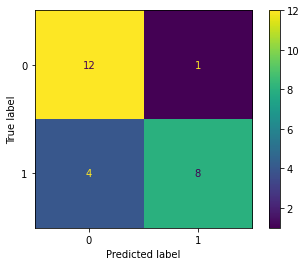

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

X, Y = make_classification(random_state=0)
XDizisi, XTest, YDizisi, YTest = train_test_split(X, Y, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(XDizisi, YDizisi)

plot_confusion_matrix(classifier, XTest, YTest) 
plt.show()